<strong><b><font size="6">Web Scraping e Análise de Dados</font></b></strong>

<strong><b><font size="4">Engenharia de Dados no Esporte - Web Scraping e Análise Estatística em Dados da NBA</font></b></strong>

## Contexto

A Ciência de Dados está em todos os lugares e, quando se trata do mundo dos esportes, a Engenharia de Dados desempenha um papel crucial na coleta, processamento e análise dos dados disponíveis. Através da Engenharia de Dados, é possível lidar com grandes volumes de informações geradas em eventos esportivos e transformá-las em conhecimentos acionáveis.

Um dos principais desafios da Engenharia de Dados no esporte é lidar com a variedade de formatos e estruturas dos dados. Os dados esportivos podem ser provenientes de diferentes fontes, como planilhas, bancos de dados relacionais, ou não relacionais como, arquivos de vídeo e transmissões ao vivo. A Engenharia de Dados deve ser capaz de integrar e harmonizar esses diferentes tipos de dados, garantindo que eles possam ser unificados e analisados de forma eficiente.

Ainda, a Engenharia de Dados desempenha um papel crítico na garantia da qualidade dos dados. Isso envolve a identificação e correção de erros, a validação da consistência dos dados e a detecção de valores ausentes ou inconsistentes. Através de técnicas de limpeza e transformação de dados, podemos garantir que os dados utilizados na análise sejam confiáveis e precisos.

## Objetivo
O objetivo do projeto a seguir é demonstrar a técnica de web scraping (raspagem) que apliquei no site <a href="https://www.basketball-reference.com">Basketball-Reference</a>, o qual possui dados estatísticos detalhados sobre a NBA (National Basketball Association), e em seguida, realizar uma análise breve utilizando os dados extraídos.


## Carregando os Pacotes Usados Neste Jupyter Notebook

In [1]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [2]:
# Imports

# Imports para Web Scraping
import bs4
import csv 
import requests 
from bs4 import BeautifulSoup

# Imports para manipulação, visualização e análise de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import pingouin as pg

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Filipe Fúculo" --iversions

Author: Filipe Fúculo

bs4       : 4.11.1
matplotlib: 3.5.2
pandas    : 1.4.4
seaborn   : 0.11.2
requests  : 2.28.1
csv       : 1.0



## Web Scraping

In [4]:
# Criamos um arquivo para salvar o resultado do web scraping
arquivo = csv.writer(open('dados/nba23.csv', 'w', encoding = "utf-8")) 

In [5]:
# Fazemos requisição à página web com os dados do nosso interesse, nesse caso temporada 2022/2023
pagina = requests.get("https://www.basketball-reference.com/leagues/NBA_2023_per_game.html")

In [6]:
# Requisição 200 indica sucesso na conexão
pagina

<Response [200]>

Visualizamos o conteúdo da pagina:

In [7]:
# Visualiza os dados
pagina.text[:500]

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/bbr/build" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202307011" />\n<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\n<script type="text/javascript" async=true>\n    (function() {\n\tvar host '

In [8]:
# Vamos fazer o parser na página HTML para formatar o texto
soup = BeautifulSoup(pagina.text, 'html.parser')

In [9]:
# Imprime os primeiros 500 caracteres para checar saída da função
print(str(soup)[:500])


<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202307011" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.locati


Mas os dados que nos interessam estão em uma tag div, class do tipo table_container. Vamos pesquisar e então extrair os dados.

In [10]:
# Busca pelo tag e classe na página HTML
tabela = soup.find("div", {"class": "table_container"})

In [11]:
# Imprime os primeiros 500 caracteres para checar saída da função
print(str(tabela)[:500])

<div class="table_container" id="div_per_game_stats">
<table class="sortable stats_table" data-cols-to-freeze=",2" data-non-qual="1" data-qual-label=" When table is sorted, hide non-qualifiers for rate stats" data-qual-text="" id="per_game_stats">
<caption>Player Per Game Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<


Na tabela, buscamos pelo termo thead a fim de extrair a "cabeça" da tabela, ou seja, o cabeçalho.

In [12]:
# Extrai o cabeçalho da tabela (título de cada coluna) e gravamos no arquivo
header = tabela.find("thead")
header_elements = header.find_all("th")
header_elements = [head.text for head in header_elements[1:]]
arquivo.writerow(header_elements)

111

In [13]:
# Visualiza os dados
header

<thead>
<tr>
<th aria-label="Rk" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">Player</th>
<th aria-label="Pos" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>
<th aria-label="Age" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season" scope="col">Age</th>
<th aria-label="Tm" class="poptip sort_default_asc center" data-stat="team_id" data-tip="Team" scope="col">Tm</th>
<th aria-label="Games" class="poptip center" data-stat="g" data-tip="Games" scope="col">G</th>
<th aria-label="Games Started" class="poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th>
<th aria-label="Minutes Played Per Game" class="poptip hide_non_quals center" data-stat="mp_per_g" data-tip="Minutes Played Per Game" scope="col"

Podemos então extrair os elementos de cada linha. Buscamos pela tag tr e class full_tabel.

In [14]:
# Extrai elementos de cada linha da tabela
elementos_linha = tabela.find_all("tr", {"class": "full_table"})

In [15]:
print(str(elementos_linha)[:1820])

[<tr class="full_table"><th class="right" csk="1" data-stat="ranker" scope="row">1</th><td class="left" csk="Achiuwa,Precious" data-append-csv="achiupr01" data-stat="player"><a href="/players/a/achiupr01.html">Precious Achiuwa</a></td><td class="center" data-stat="pos">C</td><td class="right" data-stat="age">23</td><td class="left" data-stat="team_id"><a href="/teams/TOR/2023.html">TOR</a></td><td class="right" data-stat="g">55</td><td class="right" data-stat="gs">12</td><td class="right non_qual" data-stat="mp_per_g">20.7</td><td class="right non_qual" data-stat="fg_per_g">3.6</td><td class="right non_qual" data-stat="fga_per_g">7.3</td><td class="right non_qual" data-stat="fg_pct">.485</td><td class="right non_qual" data-stat="fg3_per_g">0.5</td><td class="right non_qual" data-stat="fg3a_per_g">2.0</td><td class="right non_qual" data-stat="fg3_pct">.269</td><td class="right non_qual" data-stat="fg2_per_g">3.0</td><td class="right non_qual" data-stat="fg2a_per_g">5.4</td><td class="ri

In [16]:
# Extraímos o conteúdo de cada linha e gravamos no arquivo em disco
for row in elementos_linha:
    data_elements = row.find_all("td")
    data_elements = [data.text for data in data_elements]
    arquivo.writerow(data_elements)

Web Scraping concluído. Vamos analisar os dados.

## Carregando e Analisando os Dados

In [17]:
# Carrega o arquivo csv com o conteúdo do web scraping
df_nba = pd.read_csv('dados/nba23.csv')

In [18]:
# Shape - para retornar a quantidade de linhas e colunas do DataFrame
df_nba.shape

(439, 29)

In [19]:
# Visualiza uma amostra dos dados
pd.set_option('display.max_columns', None) #Para mostrar todas as colunas
df_nba.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
5,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,0.444,1.0,2.7,0.384,1.2,2.3,0.515,0.547,0.7,1.0,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2
6,Grayson Allen,SG,27,MIL,72,70,27.4,3.4,7.7,0.440,2.0,5.1,0.399,1.4,2.7,0.518,0.571,1.6,1.8,0.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
7,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,0.644,0.0,0.1,0.100,5.9,9.1,0.653,0.645,2.4,3.3,0.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3
8,Jose Alvarado,PG,24,NOP,61,10,21.5,3.3,8.0,0.411,1.4,4.0,0.336,1.9,4.0,0.488,0.496,1.1,1.3,0.813,0.5,1.9,2.3,3.0,1.1,0.2,1.3,2.0,9.0
9,Kyle Anderson,PF,29,MIN,69,46,28.4,3.7,7.2,0.509,0.6,1.5,0.410,3.0,5.7,0.536,0.553,1.4,2.0,0.735,1.0,4.4,5.3,4.9,1.1,0.9,1.5,2.1,9.4


**Dicionário de Dados** (conforme mostrado na fonte de dados):

- Rk -- Rank
- Pos -- Position
- Age -- Player's age on February 1 of the season
- Tm -- Team
- G -- Games
- GS -- Games Started
- MP -- Minutes Played Per Game
- FG -- Field Goals Per Game
- FGA -- Field Goal Attempts Per Game
- FG% -- Field Goal Percentage
- 3P -- 3-Point Field Goals Per Game
- 3PA -- 3-Point Field Goal Attempts Per Game
- 3P% -- 3-Point Field Goal Percentage
- 2P -- 2-Point Field Goals Per Game
- 2PA -- 2-Point Field Goal Attempts Per Game
- 2P% -- 2-Point Field Goal Percentage
- eFG% -- Effective Field Goal Percentage

Essa estatística se ajusta ao fato de que uma cesta de 3 pontos vale 1 ponto a mais do que uma cesta de 2 pontos.

- FT -- Free Throws Per Game
- FTA -- Free Throw Attempts Per Game
- FT% -- Free Throw Percentage
- ORB -- Offensive Rebounds Per Game
- DRB -- Defensive Rebounds Per Game
- TRB -- Total Rebounds Per Game
- AST -- Assists Per Game
- STL -- Steals Per Game
- BLK -- Blocks Per Game
- TOV -- Turnovers Per Game
- PF -- Personal Fouls Per Game
- PTS -- Points Per Game

### Qual a idade média dos jogadores que disputaram a temporada 2022/2023 da NBA?

In [20]:
# Idade média dos jogadores
df_nba['Age'].mean()

25.908883826879272

A idade média foi de 26 anos. E agora, um histograma para analisar a distribuição da variável idade.

<AxesSubplot:>

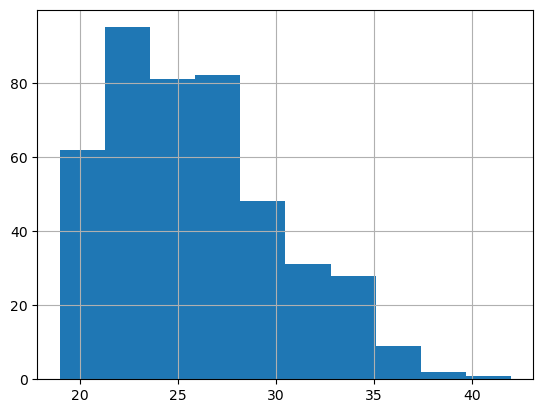

In [21]:
# Histograma
df_nba['Age'].hist()

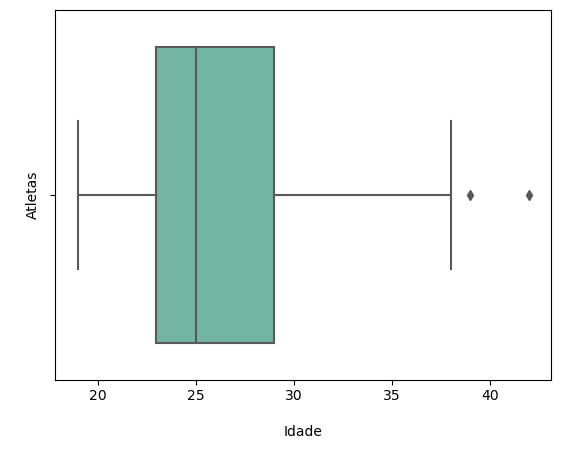

In [22]:
# BoxPlot
ax = sns.boxplot(x = df_nba['Age'], palette = "Set2", orient = "h")
plt.ylabel('\nAtletas')
plt.xlabel('\nIdade')
plt.show()

Claramente a idade média dos atletas está acima dos 25 anos e percebemos a presença de alguns outliers.

In [23]:
# Calcula e arredonda estatísticas descritivas das colunas numéricas
pd.set_option('display.max_columns', None)
df_nba.describe().round()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,439.0,439.0,439.0,439.0,439.0,439.0,438.0,439.0,439.0,426.0,439.0,439.0,436.0,438.0,439.0,439.0,421.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0
mean,26.0,49.0,23.0,20.0,3.0,7.0,0.0,1.0,3.0,0.0,2.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,4.0,2.0,1.0,0.0,1.0,2.0,9.0
std,4.0,24.0,27.0,10.0,2.0,5.0,0.0,1.0,2.0,0.0,2.0,4.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,7.0
min,19.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,23.0,31.0,1.0,12.0,2.0,3.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,4.0
50%,25.0,56.0,7.0,19.0,2.0,6.0,0.0,1.0,2.0,0.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,0.0,1.0,2.0,7.0
75%,29.0,68.0,50.0,28.0,5.0,10.0,1.0,2.0,4.0,0.0,3.0,6.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0,4.0,3.0,1.0,0.0,2.0,2.0,12.0
max,42.0,83.0,83.0,41.0,11.0,22.0,1.0,5.0,11.0,1.0,10.0,18.0,1.0,1.0,10.0,12.0,1.0,5.0,10.0,12.0,11.0,3.0,3.0,4.0,5.0,33.0


### Quais são os jogadores com maior número de pontos por jogo? Selecione os Top 10.

In [24]:
# Agrupando os dados por jogador e total de pontos
df_nba_top10 = df_nba.groupby(['Player'])['PTS'].sum().reset_index().rename(columns = {'PTS': 'Total_Pontos'})

In [25]:
# Retornamos os Top 10
df_nba_top10 = df_nba_top10.nlargest(10, 'Total_Pontos')

In [26]:
# Visualiza os dados
df_nba_top10

,Player,Total_Pontos
198,Joel Embiid,33.1
274,Luka Dončić,32.4
77,Damian Lillard,32.2
376,Shai Gilgeous-Alexander,31.4
135,Giannis Antetokounmpo,31.1
383,Stephen Curry,29.4
248,Kevin Durant,29.1
269,LeBron James,28.9
111,Donovan Mitchell,28.3
104,Devin Booker,27.8


### Quantos jogos os jogadores com 35 anos de idade ou mais iniciaram (variável GS)?

In [27]:
# Função
# O loop percorre cada linha do df_nba, verifica se o jogador tem 35 anos ou mais, e se for o caso, 
# imprimi o nome do jogador e a quantidade de jogos.
def lista_jogadores35():
    print('\nJogadores com 35 ou mais anos de idade e jogos disputados.\n')
    print('Jogador:          | Jogos:')
    print('------------------+--------')
    for index, row in df_nba.iterrows():
        if row['Age'] >= 35:
            print('{:<17} | {:>6}'.format(row['Player'], row['GS']))

In [28]:
# Executa a função
lista_jogadores35()


Jogadores com 35 ou mais anos de idade e jogos disputados.

Jogador:          | Jogos:
------------------+--------
Mike Conley       |     66
Goran Dragić      |      0
Rudy Gay          |      0
Taj Gibson        |      2
Danny Green       |      0
Jeff Green        |      4
Udonis Haslem     |      1
George Hill       |      1
Al Horford        |     63
Andre Iguodala    |      0
Joe Ingles        |      0
LeBron James      |     54
James Johnson     |      1
Kyle Lowry        |     44
Wesley Matthews   |      0
JaVale McGee      |      7
Chris Paul        |     59


### Gráfico que mostra a relação entre rebotes ofensivos e minutos jogados. 

O que podemos concluir a partir do gráfico?

In [29]:
# Função
def gera_grafico_reb_ofensivos():
    plt.figure(figsize = [10,10])
    sns.set()
    sns.regplot(x = df_nba['MP'], y = df_nba['ORB'], color = '#AA2F2F', marker = '+')
    plt.xlabel('\nMinutos Jogados (por jogo)\n', fontsize = 14, color = 'black')
    plt.ylabel('\nRebotes Ofensivos (por jogo)\n', fontsize = 14, color = 'black')
    plt.title('\nMinutos Jogados x Rebotes Ofensivos\n', fontsize = 20)
    plt.show()

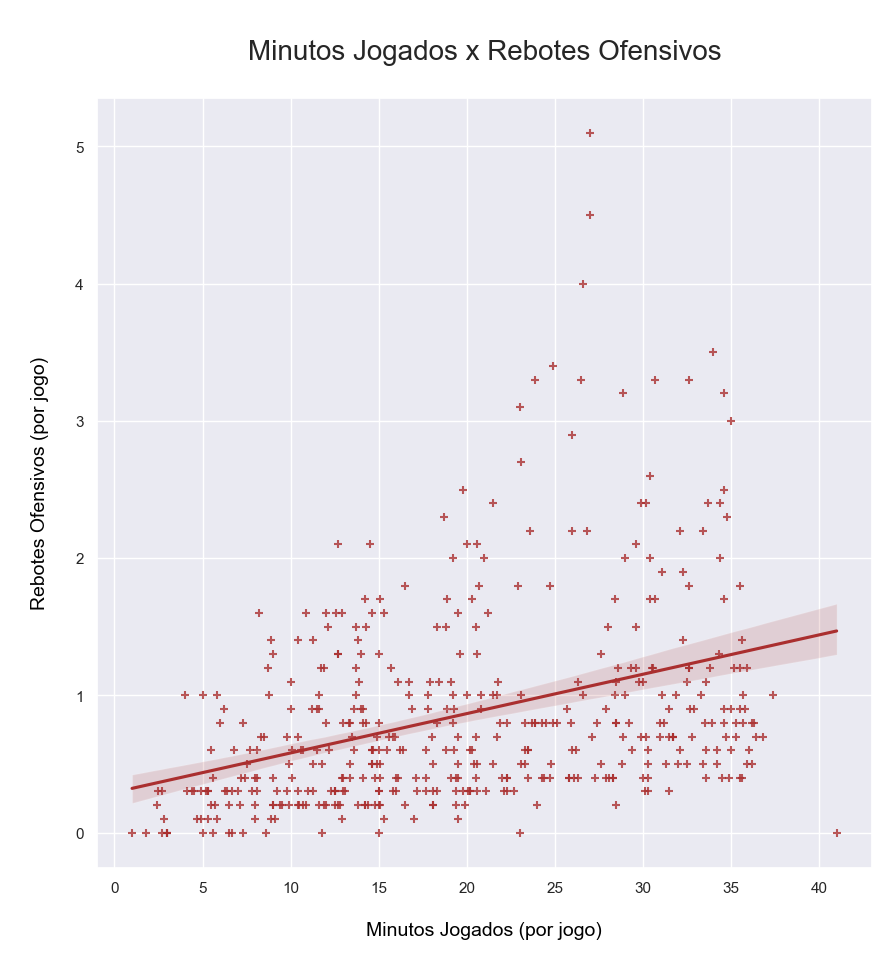

In [30]:
# Executa a função
gera_grafico_reb_ofensivos()

Aumenta a dispersão dos dados à media que aumenta o número de minutos jogados. Ou seja, com os jogadores mais cansados ao final do jogo é mais difícil fazer rebotes ofensivos.

### Gráfico que mostra a relação entre rebotes defensivos e minutos jogados. 

O que podemos concluir a partir do gráfico?

In [31]:
# Função
def gera_grafico_reb_defensivos():
    plt.figure(figsize = [10,10])
    sns.set()
    sns.regplot(x = df_nba['MP'], y = df_nba['DRB'], color = 'orange', marker = '*')
    plt.xlabel('\nMinutos Jogados (por jogo)\n', fontsize = 14, color = 'black')
    plt.ylabel('\nRebotes Defensivos (por jogo)\n', fontsize = 14, color = 'black')
    plt.title('\nMinutos Jogados x Rebotes Defensivos\n', fontsize = 20)
    plt.show()

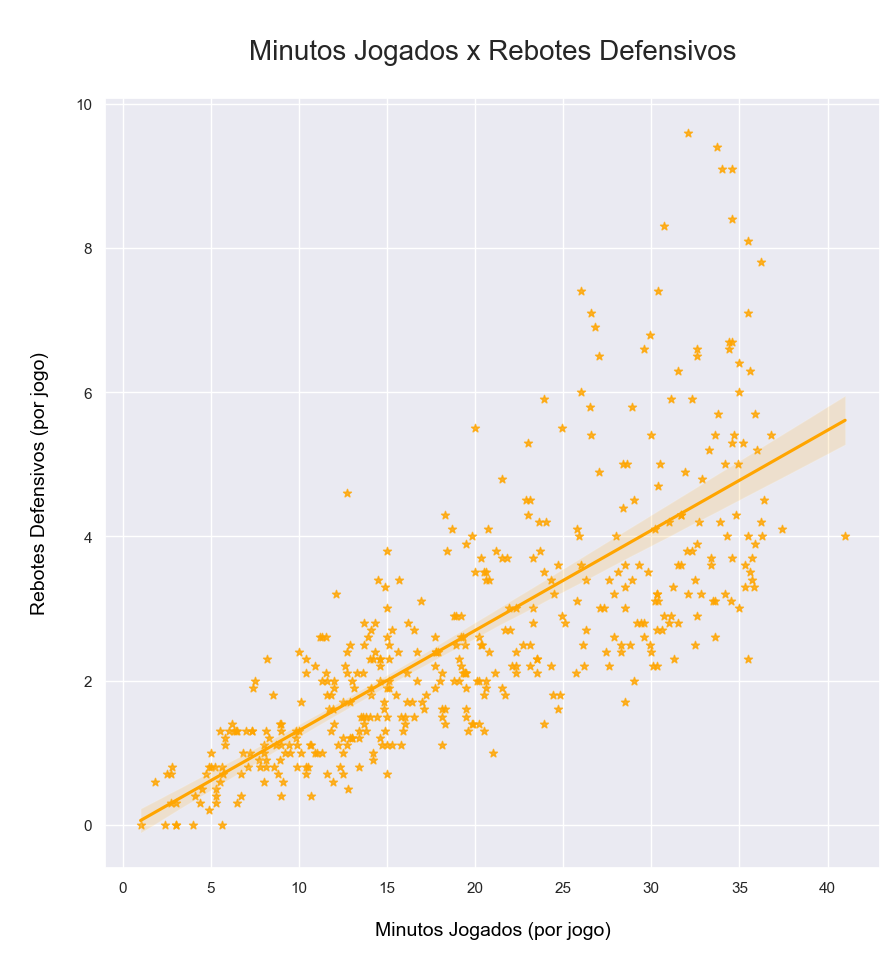

In [32]:
# Executa a função
gera_grafico_reb_defensivos()

O comportamento dos rebotes desensivos segue um padrão diferente dos rebotes ofensivos. Mais ao final do jogo, as equipes itensificam suas defesas e consequentemente aumenta o número de rebotes defensivos.

# Fim